In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


# Get Insight from the data

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [3]:
train_base = train.copy()

In [4]:
train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [6]:
# get the year base data
train['year'].value_counts()

2019    26341
2020    26341
2021    26341
Name: year, dtype: int64

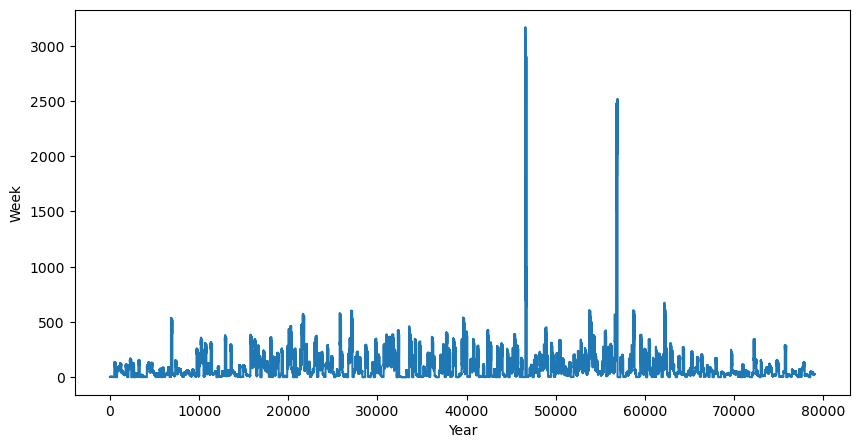

In [7]:
# visaulize Year, Week on emission
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Week")
plt.plot(train['emission']);

In [8]:
train['mavg12'] = train['emission'].rolling(window=12).mean().shift(1) 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
train[['emission', 'mavg12']][0:] 

,emission,mavg12
0,3.75,NaN
1,4.03,NaN
2,4.23,NaN
3,4.31,NaN
4,4.35,NaN
...,...,...
79018,29.40,29.63
79019,29.19,29.63
79020,29.13,29.54
79021,28.13,29.42


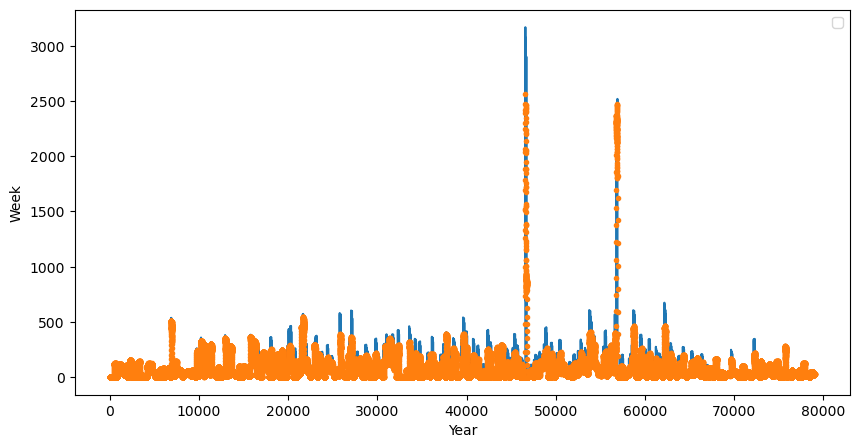

In [9]:
plt.figure( figsize=(10,5)) 
plt.xlabel( "Year" ) 
plt.ylabel( "Week" ) 
plt.plot( train['emission'][12:] ); 
plt.plot( train['mavg12'][12:], '.' ); 
plt.legend();

In [10]:
def get_mape(actual , predicted):
    y_true , y_pred = np.array(actual) , np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted)/(actual+1)))*100 , 2)

get_mape(train['emission'][36:].values , train['mavg12'][36:].values)

60.56

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(train['emission'][36:].values , train['mavg12'][36:].values))

57.15238785923444

## Exponential Smoothing

In [13]:
train['ewm'] = train['emission'].ewm(alpha = 0.2).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
train[['emission', 'ewm']][0:] 

,emission,ewm
0,3.75,3.75
1,4.03,3.90
2,4.23,4.04
3,4.31,4.13
4,4.35,4.19
...,...,...
79018,29.40,29.52
79019,29.19,29.45
79020,29.13,29.39
79021,28.13,29.14


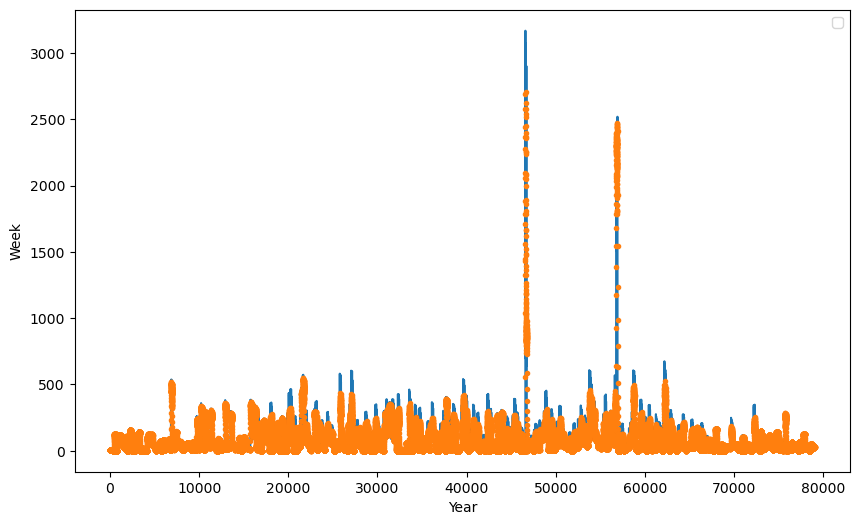

In [14]:
plt.figure( figsize=(10,6)) 
plt.xlabel( "Year" ) 
plt.ylabel( "Week" ) 
plt.plot( train['emission'][0:] ); 
plt.plot( train['ewm'][0:], '.' ); 
plt.legend();

In [15]:
get_mape(train['emission'][1:].values , train['ewm'][1:].values)

37.11

In [16]:
np.sqrt(mean_squared_error(train['emission'][1:].values , train['ewm'][1:].values))

36.264506358315224

## Import models from `arima`

In [17]:
from statsmodels.tsa.arima.model import ARIMA

ar_model=ARIMA(train.emission,order=(1,0,0)).fit()

In [18]:
forecast = ar_model.predict(0,79023)
forecast

0       81.94
1        5.45
2        5.71
3        5.92
4        5.99
         ... 
79019   30.54
79020   30.33
79021   30.28
79022   29.29
79023   28.43
Name: predicted_mean, Length: 79024, dtype: float64

In [19]:
train['ar'] = forecast

In [20]:
get_mape(train.emission[0:79023] , forecast)


34.0

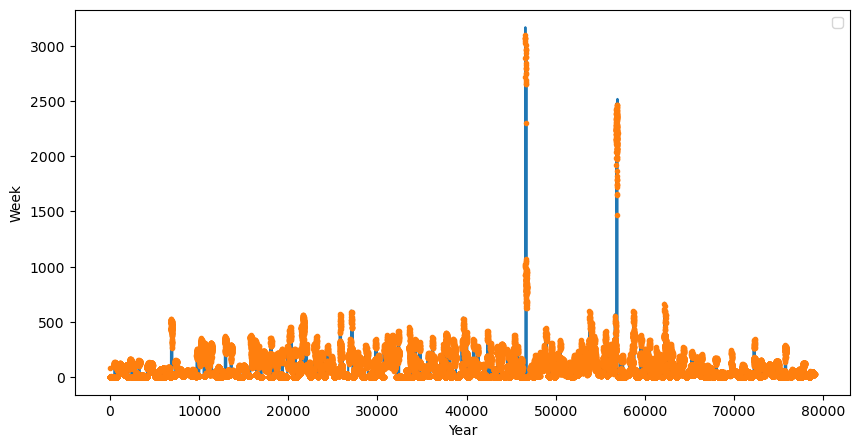

In [21]:
plt.figure( figsize=(10,5)) 
plt.xlabel( "Year" ) 
plt.ylabel( "Week" ) 
plt.plot( train['emission'][0:] ); 
plt.plot( forecast, '.' ); 
plt.legend();

In [22]:
ma_model=ARIMA(train.emission,order=(0,0,1)).fit()

In [23]:
forecast = ma_model.predict(0,79023)
get_mape(train.emission[0:79023] , forecast)

591.93

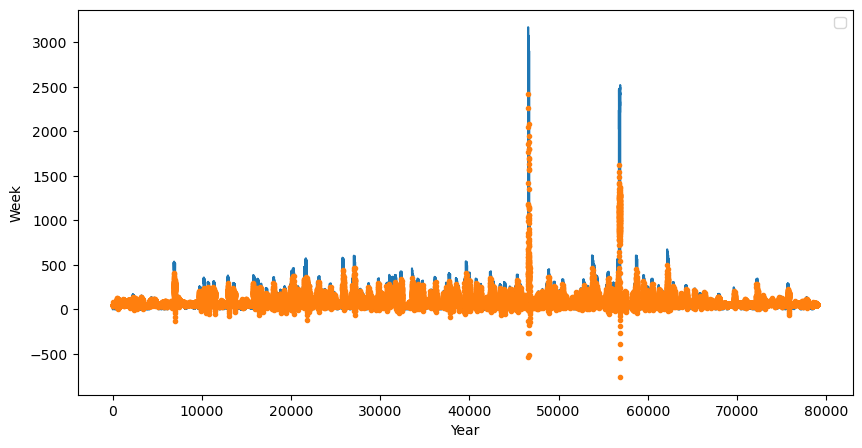

In [24]:
plt.figure( figsize=(10,5)) 
plt.xlabel( "Year" ) 
plt.ylabel( "Week" ) 
plt.plot( train['emission'][1:] ); 
plt.plot( forecast, '.' ); 
plt.legend();

In [25]:
arma_model=ARIMA(train.emission,order=(1,0,1)).fit()
forecast = arma_model.predict(0,79023)
get_mape(train.emission[0:79023] , forecast)

34.09

In [26]:
train['arma'] = forecast

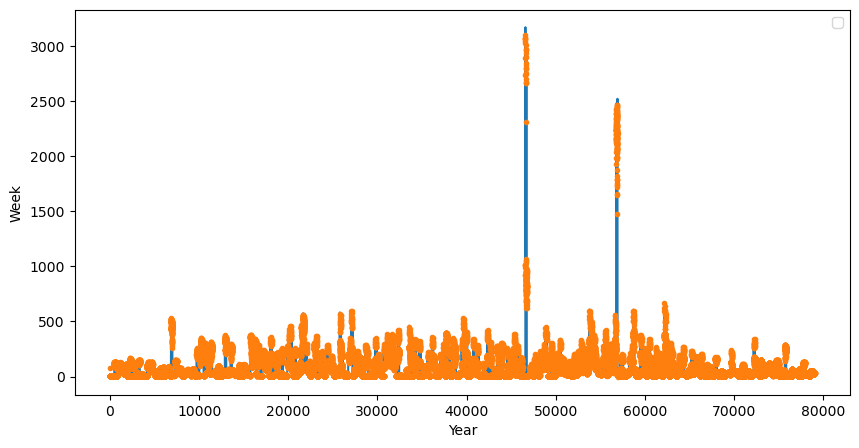

In [27]:
plt.figure( figsize=(10,5)) 
plt.xlabel( "Year" ) 
plt.ylabel( "Week" ) 
plt.plot( train['emission'][1:] ); 
plt.plot( forecast, '.' ); 
plt.legend();

## `adfuller` test

In [28]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test( ts ): 
    adfuller_result = adfuller( ts, autolag=None ) 
    adfuller_out = pd.Series(adfuller_result[0:4], 
    index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']) 
    print( adfuller_out ) 

In [29]:
adfuller_test(train.emission)

Test Statistic                  -18.23
p-value                           0.00
Lags Used                        64.00
Number of Observations Used   78958.00
dtype: float64


In [30]:
train = train.drop(['ID_LAT_LON_YEAR_WEEK'],axis=1)

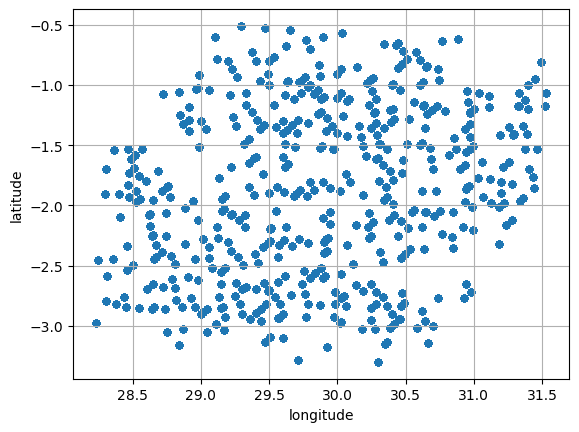

In [31]:
train.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

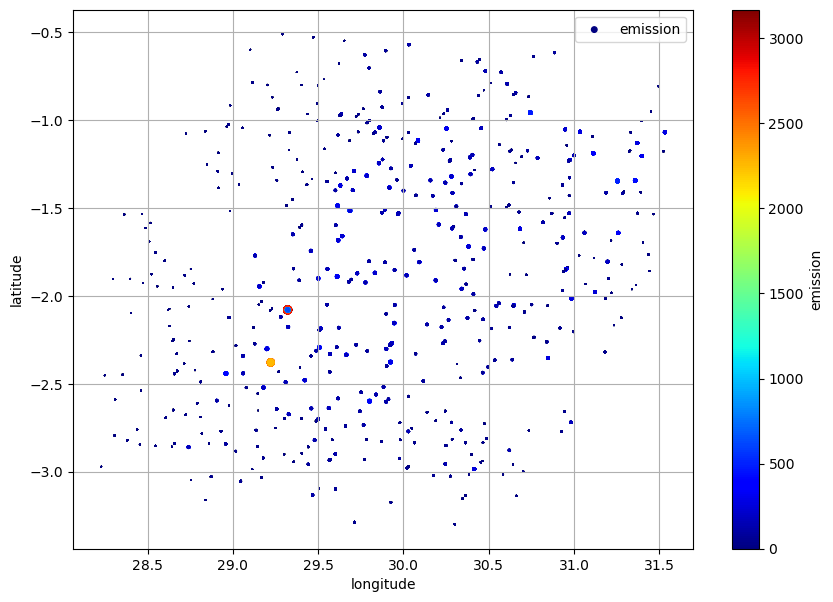

In [32]:
train.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=train["emission"] / 100, label="emission",
             c="emission", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

### Preprocessing

In [33]:
train_base = train_base.drop(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no','UvAerosolIndex_absorbing_aerosol_index',
       'UvAerosolIndex_sensor_altitude', 'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle',],axis=1)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
train_base = imputer.fit_transform(train_base)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
train_scaled = pca.fit_transform(train_base)

In [36]:
train_scaled

array([[ -1881.12630134],
       [-13103.28300395],
       [ -2655.71980882],
       ...,
       [  4305.47922244],
       [ 17721.36635712],
       [ 16480.52020885]])

In [37]:
data=pd.concat([train[['ewm','ar','arma','emission']], pd.DataFrame({'gasfeatures':train_scaled.flatten()})], axis=1)
data.head()

,ewm,ar,arma,emission,gasfeatures
0,3.75,81.94,81.94,3.75,-1881.13
1,3.90,5.45,5.45,4.03,-13103.28
2,4.04,5.71,5.72,4.23,-2655.72
3,4.13,5.92,5.92,4.31,11731.11
4,4.19,5.99,6.00,4.35,-8067.51


In [38]:
X = data.drop(['emission'],axis=1)
y = data['emission']

In [39]:
from sklearn.model_selection import train_test_split
X_train ,X_valid , y_train , y_valid = train_test_split(X , y , test_size=0.2 , random_state=42)

## Model fit

In [40]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=100, max_depth=10 , random_state=42)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 25.362499815717715 


In [41]:
import lightgbm as lgbm

reg = lgbm.LGBMRegressor(n_estimators=100, max_depth=10 , random_state=42)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 37.65227987227667 


In [42]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=100, max_depth=10 , random_state=42)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 21.134996795470954 


In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 21.109941771427117 


In [44]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 21.374579623325822 


## Stacking `ensemble`

In [45]:
from sklearn.ensemble import StackingRegressor

stacking_reg = StackingRegressor(
    estimators = [
        ('LinearRegression ',LinearRegression()),
        ('ExtraTreesRegressor',ExtraTreesRegressor()),
        ('Elastic Net ', ElasticNet()),
        ('XGBoost' , xgb.XGBRegressor())
    ],
    final_estimator = ExtraTreesRegressor() , cv = 5
)
stacking_reg.fit(X_train , y_train)

StackingRegressor(cv=5,
                  estimators=[('LinearRegression ', LinearRegression()),
                              ('ExtraTreesRegressor', ExtraTreesRegressor()),
                              ('Elastic Net ', ElasticNet()),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=No...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                  final_estimator=ExtraTreesRegressor())

In [46]:
y_pred = stacking_reg.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")

Root mean squared error of the model : 21.511765341098208 


In [47]:
import pickle
pickle.dump(reg, open("predict_co2_emission.pkl", "wb"))